In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, optimizers, regularizers


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
model = models.Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))

model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))

model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3),activation='relu'))

model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(9, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                  rotation_range=40,
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2,
                  horizontal_flip=True,
                  validation_split=0.2
                  )

In [4]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [5]:
train_generator = train_datagen.flow_from_directory('/kaggle/input/solar-system-planets/planetsdataset_completo/training',
                                 target_size=(150,150),
                                 batch_size=64,
                                 class_mode='sparse')
                                                   

validation_generator = test_datagen.flow_from_directory('/kaggle/input/solar-system-planets/planetsdataset_completo/validation',
                                 target_size=(150,150),
                                 batch_size=64,
                                 class_mode='sparse')
                                                       

Found 1834 images belonging to 9 classes.
Found 519 images belonging to 9 classes.


In [6]:
train_generator.class_indices

{'earth': 0,
 'jupiter': 1,
 'mars': 2,
 'mercury': 3,
 'neptune': 4,
 'pluto': 5,
 'saturn': 6,
 'uranus': 7,
 'venus': 8}

In [7]:
checkpoint = ModelCheckpoint('planets.hdf5',monitor='val_accuracy',verbose=1,save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10)

In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(),
             metrics=['accuracy'])

In [9]:
hist = model.fit(train_generator, steps_per_epoch=1834//64,
                epochs=10,
                validation_data=validation_generator,
                 validation_steps= 519//64,
                 callbacks=[checkpoint,early])

Epoch 1/10


2023-10-19 05:45:46.514047: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


28/28 [==============================] - ETA: 0s - loss: 2.2602 - accuracy: 0.3215
Epoch 1: val_accuracy improved from -inf to 0.60938, saving model to planets.hdf5
28/28 [==============================] - 33s 868ms/step - loss: 2.2602 - accuracy: 0.3215 - val_loss: 1.9784 - val_accuracy: 0.6094
Epoch 2/10
28/28 [==============================] - ETA: 0s - loss: 1.0895 - accuracy: 0.6085
Epoch 2: val_accuracy did not improve from 0.60938
28/28 [==============================] - 12s 438ms/step - loss: 1.0895 - accuracy: 0.6085 - val_loss: 1.9069 - val_accuracy: 0.3652
Epoch 3/10
28/28 [==============================] - ETA: 0s - loss: 0.8965 - accuracy: 0.6576
Epoch 3: val_accuracy did not improve from 0.60938
28/28 [==============================] - 12s 427ms/step - loss: 0.8965 - accuracy: 0.6576 - val_loss: 1.8392 - val_accuracy: 0.2617
Epoch 4/10
28/28 [==============================] - ETA: 0s - loss: 0.7827 - accuracy: 0.7068
Epoch 4: val_accuracy did not improve from 0.60938
28/2

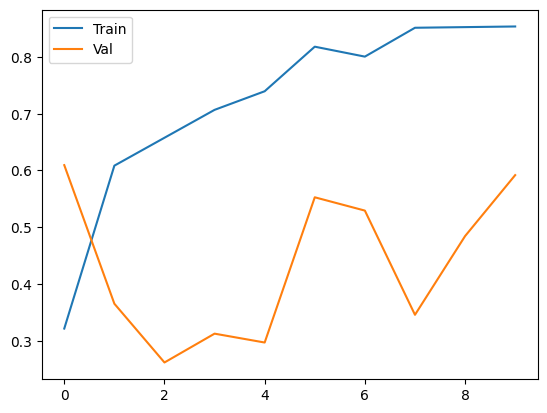

In [10]:
plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Val')
plt.legend()
plt.show()

In [11]:
test_generator = test_datagen.flow_from_directory('/kaggle/input/solar-system-planets/planetsdataset_completo/test',
                                 target_size=(150,150),
                                 batch_size=64,
                                 class_mode='sparse'
                                 )

Found 255 images belonging to 9 classes.


In [12]:
from keras.models import clone_model
model2 = clone_model(model)
model2.load_weights('/kaggle/working/planets.hdf5')

In [13]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(),
             metrics=['accuracy'])

model2.evaluate(test_generator)

4/4 [==============================] - 2s 488ms/step - loss: 1.9766 - accuracy: 0.6157


[1.9765574932098389, 0.615686297416687]

In [14]:
for i in test_generator:
    a = i
    break

0.0


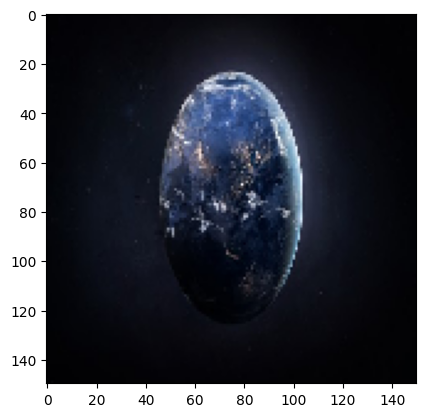

In [15]:
plt.imshow(a[0][0])
print(a[1][0])


In [16]:
def visualize_prediction(model,data):
    prediction = model.predict(data)
    max_value = prediction[0].max()
    max_index = np.argmax(prediction[0])
    name = data.directory.split('_')[-1]
    print(max_value)
    planet_mapping = {
        prediction[0][0]: "Earth",
        prediction[0][1]: "Jupiter",
        prediction[0][2]: "Mars",
        prediction[0][3]: "Mercury",
        prediction[0][4]: "Neptune",
        prediction[0][5]: "Pluto",
        prediction[0][6]: "Saturn",
        prediction[0][7]: "Uranus",
        prediction[0][8]: "Venus",
    }    
    images, labels = next(data) 
    
    plt.style.use('ggplot')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))   
    ax1.imshow(images[0])
    ax1.set_title(name) 
    ax1.grid(False)

    ax2.set_xticks(range(9))
    ax2.set_xticklabels(["Earth", "Jupiter", "Mars", "Mercury", "Neptune", "Pluto", "Saturn", "Uranus", "Venus"])
    ax2.set_yticks(np.linspace(0, 1, 11))
    colors = ["#777777"] * 9
    colors[max_index] = "#68CF20"
    thisplot = ax2.bar(range(9), prediction[0], color=colors)
    ax2.set_ylim([0, 1])
    ax2.set_title("Probabilidad por categoria")
    plt.tight_layout()
    plt.show()    
    
    if max_value in planet_mapping:
        print(f"La predicción es el planeta: '{planet_mapping[max_value]}'")  

In [17]:
val = test_datagen.flow_from_directory('/kaggle/input/planets-and-moons-dataset-ai-in-space/Test_Mars',
                                 target_size=(150,150),
                                 batch_size=64,
                                 class_mode='sparse'
                                 )

Found 1 images belonging to 1 classes.


1/1 [==============================] - 0s 219ms/step
1.0


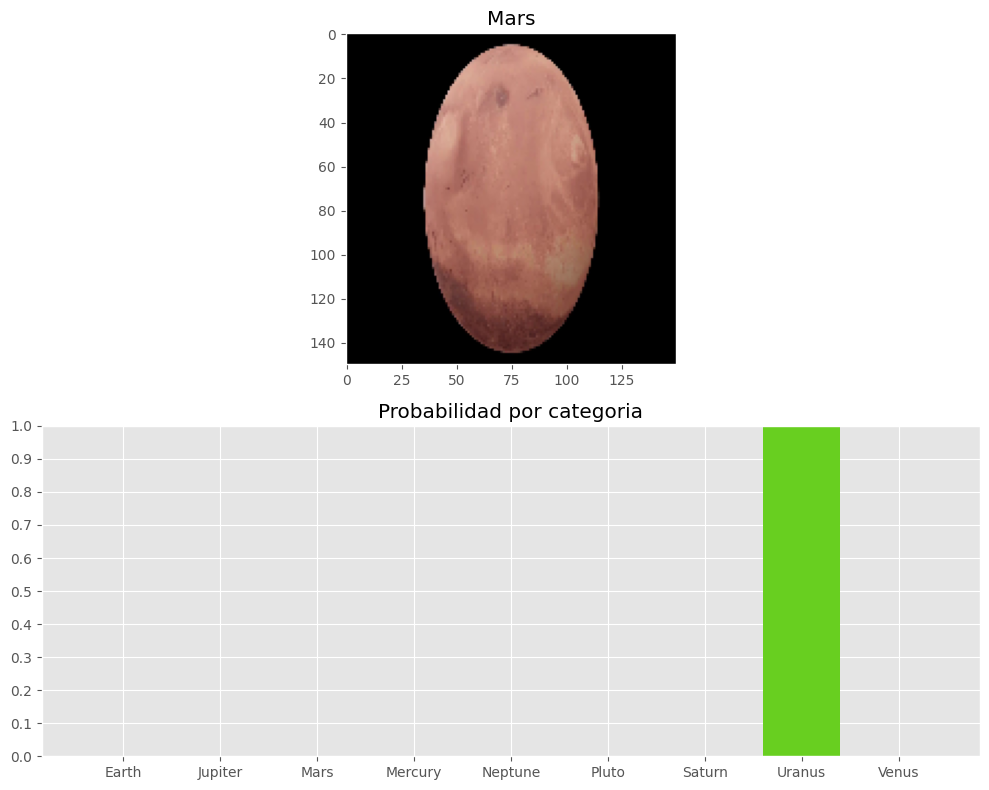

La predicción es el planeta: 'Uranus'


In [18]:
visualize_prediction(model2,val)

#### Modelo Secuencial usando estructura de keras implementando convoluciones

In [19]:
def Model_Convolutional(shapes):
    inputs = keras.Input(shape=shapes)

    x = layers.Conv2D(filters=64, kernel_size=3, padding = 'same')(inputs)
    
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    x = layers.SpatialDropout2D(0.2)(x)

    x = layers.MaxPool2D(pool_size = 2)(x)

    x = layers.Conv2D(filters=128, kernel_size=3, padding = 'same', activation='leaky_relu')(x)
    x = layers.Conv2D(filters=128, kernel_size=3, padding = 'same', activation='leaky_relu')(x)
    
    x = layers.SpatialDropout2D(0.2)(x)

    x = layers.MaxPool2D(pool_size = 2)(x)

    x = layers.Conv2D(filters=256, kernel_size=3, padding = 'same', activation='leaky_relu')(x)
    x = layers.Conv2D(filters=256, kernel_size=3, padding = 'same', activation='leaky_relu')(x)

    x = layers.SpatialDropout2D(0.2)(x)

    x = layers.MaxPool2D(pool_size = 2)(x)

    x = layers.Conv2D(filters=512, kernel_size=3, padding = 'same', activation='leaky_relu')(x)
    x = layers.Conv2D(filters=512, kernel_size=3, padding = 'same', activation='leaky_relu')(x)

    x = layers.SpatialDropout2D(0.2)(x)

    x = layers.Flatten()(x)

    x = layers.Dense(100, activation='leaky_relu')(x)

    outputs = layers.Dense(9, activation='softmax')(x)

    model = keras.Model(inputs = inputs, outputs = outputs)
    
    return model

In [20]:
model_primary = Model_Convolutional(shapes = (150,150,3))
model_primary.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 batch_normalization_1 (Batc  (None, 150, 150, 64)     256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 64)      0         
                                                                 
 spatial_dropout2d (SpatialD  (None, 150, 150, 64)     0         
 ropout2D)                                                       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 64)       0     

In [21]:
model_primary.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [22]:
checkpoint = keras.callbacks.ModelCheckpoint('planets.hdf5', monitor = 'val_accuracy', verbose = 1, save_best_only = True)
model_primary.fit(train_generator, 
                  validation_data=test_generator, 
                  epochs = 30,
                  batch_size = 64, 
                  verbose = 1,
                 callbacks=[checkpoint]
                 )

Epoch 1/30


2023-10-19 05:48:15.158481: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/spatial_dropout2d/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


29/29 [==============================] - ETA: 0s - loss: 1.6173 - accuracy: 0.4133
Epoch 1: val_accuracy improved from -inf to 0.20784, saving model to planets.hdf5
29/29 [==============================] - 25s 597ms/step - loss: 1.6173 - accuracy: 0.4133 - val_loss: 1.9417 - val_accuracy: 0.2078
Epoch 2/30
29/29 [==============================] - ETA: 0s - loss: 1.0373 - accuracy: 0.6298
Epoch 2: val_accuracy improved from 0.20784 to 0.45098, saving model to planets.hdf5
29/29 [==============================] - 14s 474ms/step - loss: 1.0373 - accuracy: 0.6298 - val_loss: 1.8108 - val_accuracy: 0.4510
Epoch 3/30
29/29 [==============================] - ETA: 0s - loss: 0.9101 - accuracy: 0.6609
Epoch 3: val_accuracy improved from 0.45098 to 0.48627, saving model to planets.hdf5
29/29 [==============================] - 14s 466ms/step - loss: 0.9101 - accuracy: 0.6609 - val_loss: 1.7185 - val_accuracy: 0.4863
Epoch 4/30
29/29 [==============================] - ETA: 0s - loss: 0.7739 - accu

In [23]:
model_primary.compile(
    optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.00001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model_primary.fit(train_generator, 
                  validation_data=test_generator, 
                  epochs = 10,
                  batch_size = 64, 
                  verbose = 1,
                 callbacks=[checkpoint]
                 )

Epoch 1/10


2023-10-19 05:55:17.156433: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/spatial_dropout2d/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


29/29 [==============================] - ETA: 0s - loss: 0.1578 - accuracy: 0.9460
Epoch 1: val_accuracy improved from 0.94510 to 0.96863, saving model to planets.hdf5
29/29 [==============================] - 17s 484ms/step - loss: 0.1578 - accuracy: 0.9460 - val_loss: 0.1362 - val_accuracy: 0.9686
Epoch 2/10
29/29 [==============================] - ETA: 0s - loss: 0.1176 - accuracy: 0.9640
Epoch 2: val_accuracy did not improve from 0.96863
29/29 [==============================] - 13s 447ms/step - loss: 0.1176 - accuracy: 0.9640 - val_loss: 0.1447 - val_accuracy: 0.9647
Epoch 3/10
29/29 [==============================] - ETA: 0s - loss: 0.1104 - accuracy: 0.9646
Epoch 3: val_accuracy improved from 0.96863 to 0.97255, saving model to planets.hdf5
29/29 [==============================] - 14s 464ms/step - loss: 0.1104 - accuracy: 0.9646 - val_loss: 0.1295 - val_accuracy: 0.9725
Epoch 4/10
29/29 [==============================] - ETA: 0s - loss: 0.0987 - accuracy: 0.9700
Epoch 4: val_accur

In [24]:
from keras.models import clone_model
model_primary2 = clone_model(model_primary)
model_primary2.load_weights('/kaggle/working/planets.hdf5')

In [25]:
model_primary2.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(),
             metrics=['accuracy'])

model_primary2.evaluate(test_generator)

4/4 [==============================] - 1s 129ms/step - loss: 0.1295 - accuracy: 0.9725


[0.12947222590446472, 0.9725490212440491]

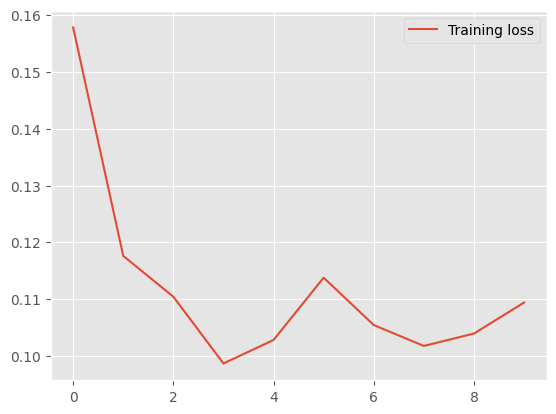

In [26]:
history_loss = model_primary.history.history['loss']
history_accuracy = model_primary.history.history['accuracy']
history_accuracy_val = model_primary.history.history['val_accuracy']

import matplotlib.pyplot as plt

plt.plot(history_loss, label = 'Training loss')
plt.legend()
plt.show()

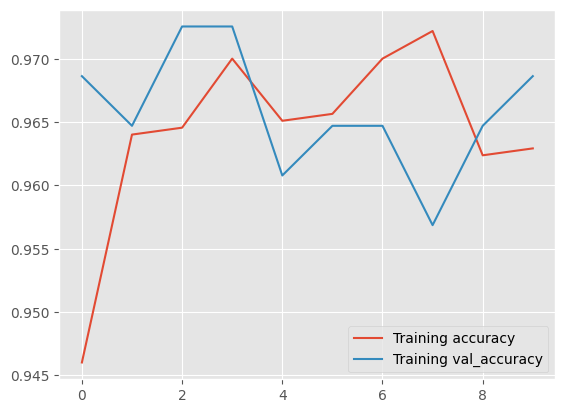

In [27]:
plt.plot(history_accuracy, label = 'Training accuracy')
plt.plot(history_accuracy_val, label = 'Training val_accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 303ms/step
0.99998236


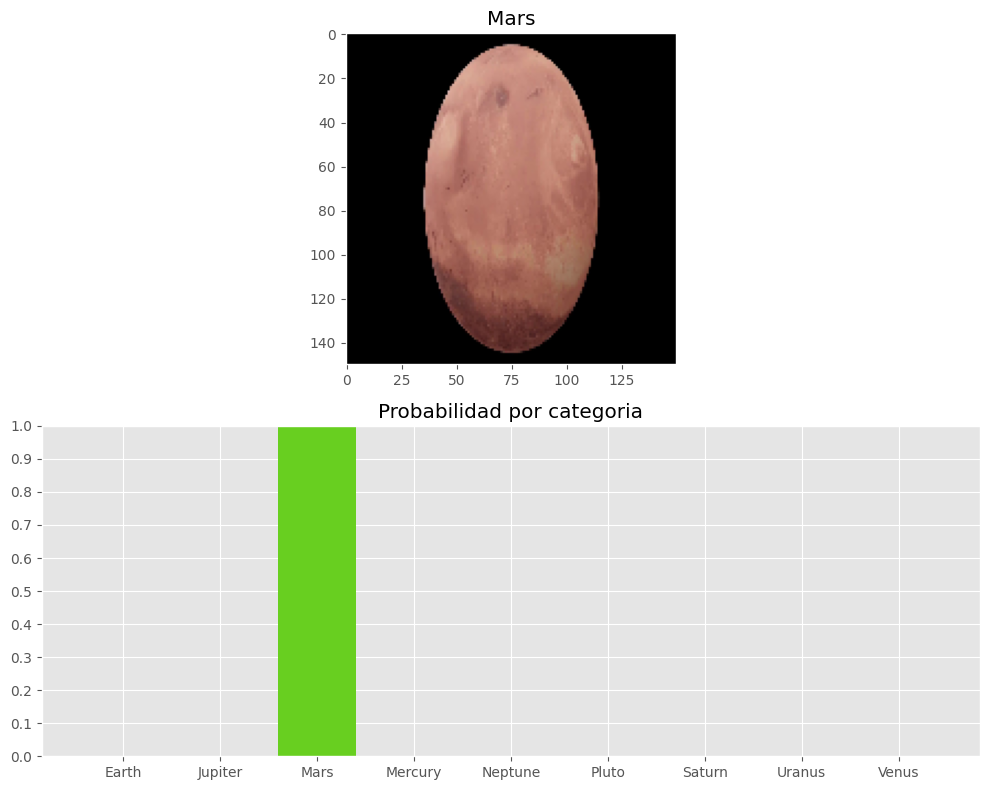

La predicción es el planeta: 'Mars'


In [28]:
visualize_prediction(model_primary,val)